In [71]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [72]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [73]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [74]:
df['Date'] = pd.to_datetime(df['date'])

In [75]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [76]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [77]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [78]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [79]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [80]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [81]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [82]:
Ahm_Mix1 = df[(df['city'] == 'Ahmd') & (df['product'] == 'Mixers')]

In [83]:
Ahm_Mix1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Mixers,11-01-2017,Ahmd,671833
2017-12-01,Mixers,12-01-2017,Ahmd,1114795
2018-01-01,Mixers,01-01-2018,Ahmd,1620735
2018-02-01,Mixers,02-01-2018,Ahmd,606837
2018-03-01,Mixers,03-01-2018,Ahmd,1003019


In [84]:
Ahm_Mix1.shape

(48, 4)

In [85]:
Ahm_Mix= Ahm_Mix1.drop('date', axis = 1)

In [86]:
Ahm_Mix.head()

,product,city,sales
Date,,,
2014-04-01,Mixers,Ahmd,641078
2014-05-01,Mixers,Ahmd,924673
2014-06-01,Mixers,Ahmd,701687
2014-07-01,Mixers,Ahmd,886175
2014-08-01,Mixers,Ahmd,940564


In [87]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

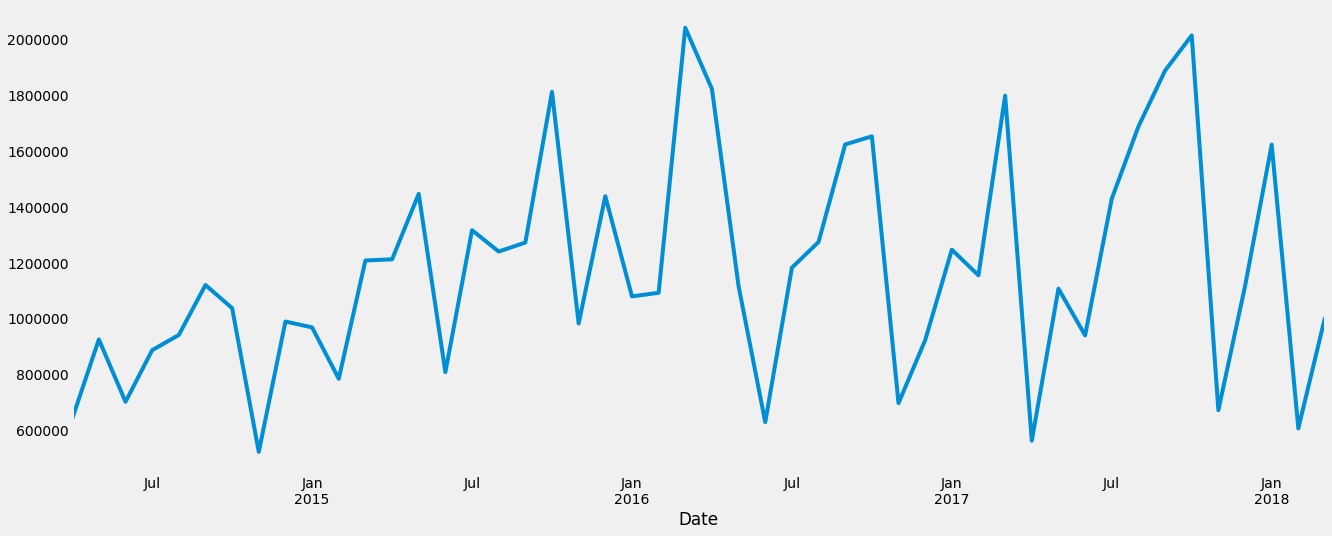

In [88]:
Ahm_Mix['sales'].plot()
plt.grid();

In [89]:
Ahm_Mix.sort_index(inplace= True)

In [90]:
Ahm_Mix.head()

,product,city,sales
Date,,,
2014-04-01,Mixers,Ahmd,641078
2014-05-01,Mixers,Ahmd,924673
2014-06-01,Mixers,Ahmd,701687
2014-07-01,Mixers,Ahmd,886175
2014-08-01,Mixers,Ahmd,940564


In [91]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

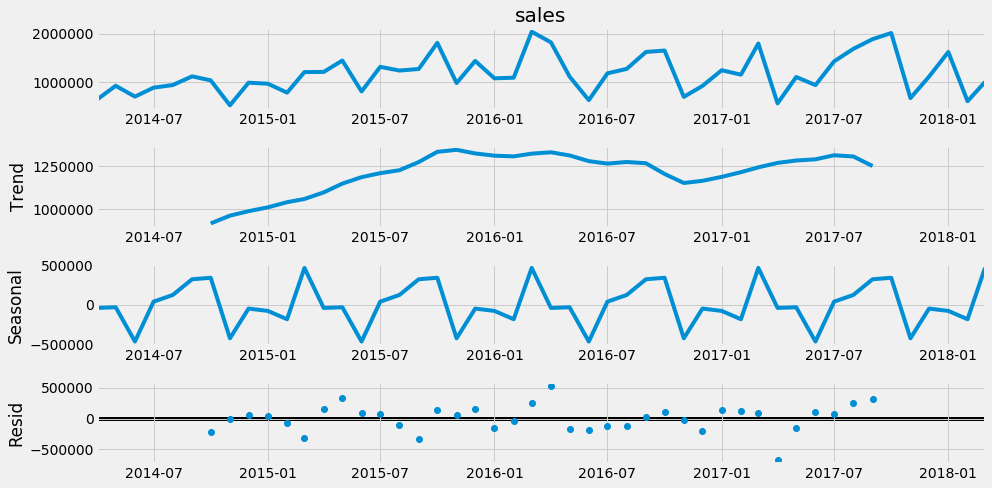

In [92]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ahm_Mix['sales'],model='additive')
decomposition.plot();

In [93]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    9.170267e+05
2014-11-01    9.624414e+05
2014-12-01    9.885387e+05
2015-01-01    1.010831e+06
2015-02-01    1.041123e+06
2015-03-01    1.059869e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -42245.671296
2014-05-01    -33568.768519
2014-06-01   -467386.351852
2014-07-01     37591.009259
2014-08-01    122133.398148
2014-09-01    320957.495370
2014-10-01    339883.037037
2014-11-01   -426619.462963
2014-12-01    -50438.032407
2015-01-01    -79756.324074
2015-02-01   -185126.046296
2015-03-01    464575.717593
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01   -220487.703704
2014-11-01    -13088.953704
2014-

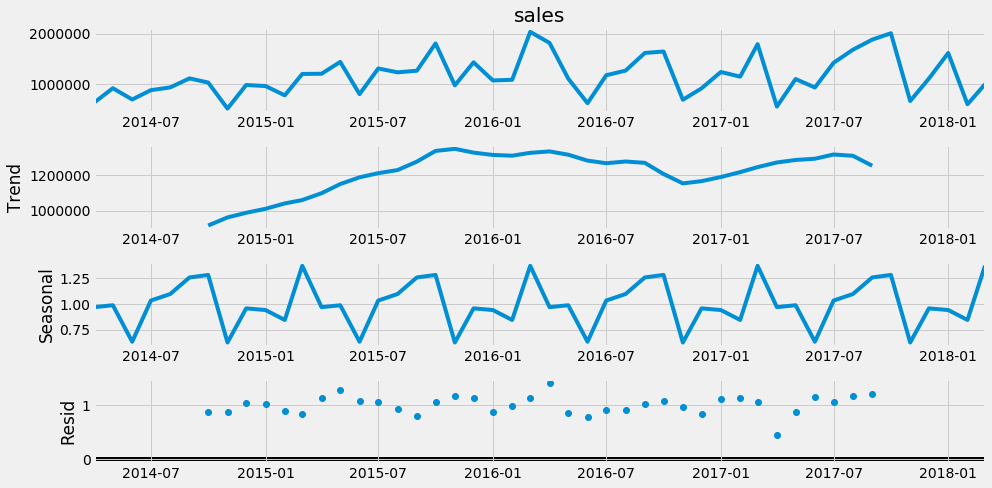

In [94]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Ahm_Mix['sales'],model='multiplicative')
decomposition.plot();

In [95]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    9.170267e+05
2014-11-01    9.624414e+05
2014-12-01    9.885387e+05
2015-01-01    1.010831e+06
2015-02-01    1.041123e+06
2015-03-01    1.059869e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    0.969143
2014-05-01    0.987671
2014-06-01    0.632138
2014-07-01    1.033508
2014-08-01    1.096948
2014-09-01    1.258566
2014-10-01    1.283141
2014-11-01    0.624640
2014-12-01    0.957069
2015-01-01    0.941044
2015-02-01    0.844198
2015-03-01    1.371932
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01    0.880806
2014-11-01    0.869512
2014-12-01    1.044944
2015-01-01    1.017184
2015-02-01    0.892065
2015-03-01    0.829957
Name: resid, 

In [96]:
Ahm_Mix.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [97]:
train    =   Ahm_Mix[0:int(len(Ahm_Mix)*0.7)] 
test     =  Ahm_Mix[int(len(Ahm_Mix)*0.7):]

In [98]:
train.shape

(33, 3)

In [99]:
test.shape

(15, 3)

In [100]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Mixers,Ahmd,641078
2014-05-01,Mixers,Ahmd,924673
2014-06-01,Mixers,Ahmd,701687
2014-07-01,Mixers,Ahmd,886175
2014-08-01,Mixers,Ahmd,940564


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Mixers,Ahmd,1272778
2016-09-01,Mixers,Ahmd,1621483
2016-10-01,Mixers,Ahmd,1650369
2016-11-01,Mixers,Ahmd,696898
2016-12-01,Mixers,Ahmd,921900


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Mixers,Ahmd,1245386
2017-02-01,Mixers,Ahmd,1153678
2017-03-01,Mixers,Ahmd,1795761
2017-04-01,Mixers,Ahmd,562690
2017-05-01,Mixers,Ahmd,1106033


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Mixers,Ahmd,671833
2017-12-01,Mixers,Ahmd,1114795
2018-01-01,Mixers,Ahmd,1620735
2018-02-01,Mixers,Ahmd,606837
2018-03-01,Mixers,Ahmd,1003019


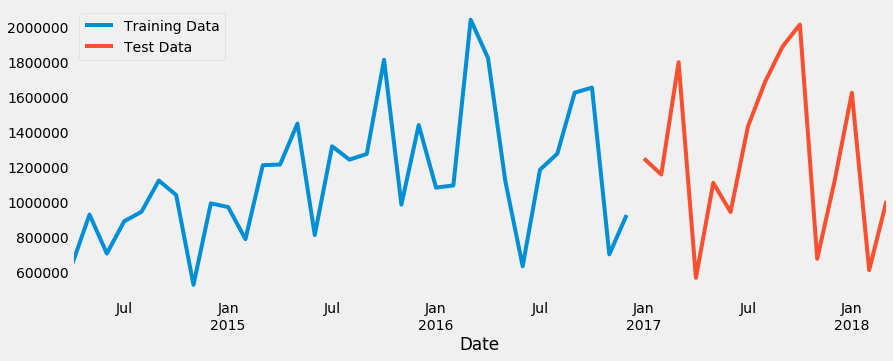

In [101]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [102]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [103]:
from sklearn import metrics

Simpleaverage

In [104]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [105]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Mixers,Ahmd,1245386,1.131857e+06
2017-02-01,Mixers,Ahmd,1153678,1.131857e+06
2017-03-01,Mixers,Ahmd,1795761,1.131857e+06
2017-04-01,Mixers,Ahmd,562690,1.131857e+06
2017-05-01,Mixers,Ahmd,1106033,1.131857e+06


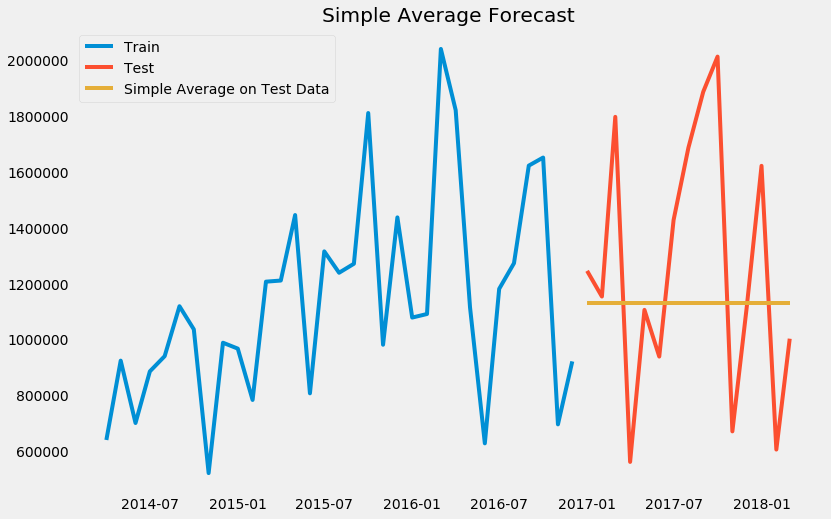

In [106]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [107]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 468562.164


In [108]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,468562.164265


In [109]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [110]:
SES_train = train.copy()
SES_test = test.copy()

In [111]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [112]:
model_SES_autofit = model_SES.fit(optimized=True)

In [113]:
model_SES_autofit.params

{'smoothing_level': 0.22372093023255812,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 641078.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [114]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Mixers,Ahmd,1245386,1.166398e+06
2017-02-01,Mixers,Ahmd,1153678,1.166398e+06
2017-03-01,Mixers,Ahmd,1795761,1.166398e+06
2017-04-01,Mixers,Ahmd,562690,1.166398e+06
2017-05-01,Mixers,Ahmd,1106033,1.166398e+06


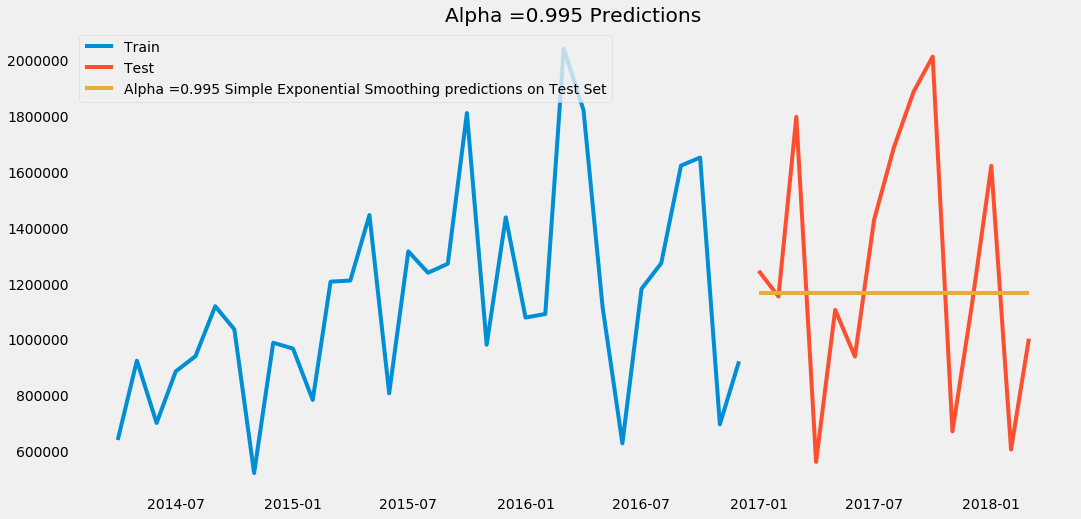

In [115]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [116]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 460672.574


In [117]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 34.894548192008564


In [119]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548


In [120]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [121]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [122]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,378682.532014,456387.404891
1,0.2,356688.235673,458408.085165
2,0.3,358760.562747,470881.220227
3,0.4,366203.548901,489173.462627
4,0.5,374978.619065,510976.874484
5,0.6,383971.156735,533597.632842
6,0.7,393119.773970,553317.819133
7,0.8,402855.480896,566255.487435
8,0.9,413822.670981,569477.677690


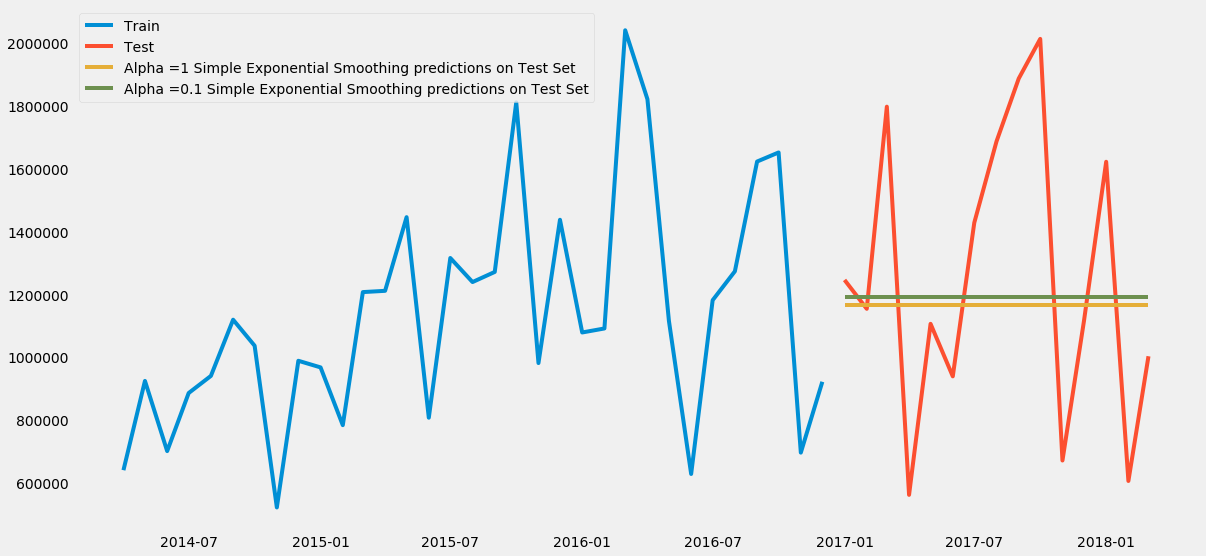

In [123]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [124]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: 35.81683911336095


In [125]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839


Double

In [126]:
DES_train = train.copy()
DES_test = test.copy()

In [127]:
model_DES = Holt(DES_train['sales'])

In [128]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [129]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [130]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.3,633103.340341,4.746191e+05
1,0.1,0.4,585405.070520,4.535864e+05
2,0.1,0.5,562095.546080,4.786420e+05
3,0.1,0.6,546098.843818,7.278531e+05
4,0.1,0.7,530030.689924,1.069244e+06
...,...,...,...,...
75,1.0,0.6,569208.661783,1.073203e+06
76,1.0,0.7,596829.293503,7.572181e+05
77,1.0,0.8,626780.924525,4.891064e+05
78,1.0,0.9,659742.171851,9.292892e+05


In [131]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
1,0.1,0.4,585405.070520,453586.439994
0,0.1,0.3,633103.340341,474619.077552
2,0.1,0.5,562095.546080,478642.038821
77,1.0,0.8,626780.924525,489106.413924
71,0.9,1.0,629903.054310,539007.527387


In [132]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.4])
print('\nMAPE:',mape)


MAPE: 40.261133073607915


In [133]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",453586.439994,40.261133


In [134]:
TES_train = train.copy()
TES_test = test.copy()

In [135]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='multiplicative',initialization_method='estimated')

In [136]:
model_TES_autofit = model_TES.fit()

In [137]:
model_TES_autofit.params

{'smoothing_level': 0.21714285714285714,
 'smoothing_trend': 0.0501098901098901,
 'smoothing_seasonal': 0.09394285714285716,
 'damping_trend': nan,
 'initial_level': 885738.583333333,
 'initial_trend': 32160.81969696973,
 'initial_seasons': array([1.13521007, 1.2941984 , 0.70054373, 1.11852637, 1.03859161,
        1.02592287, 1.16389612, 0.55932622, 1.02990151, 0.98575516,
        0.77553345, 1.17259449]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [138]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Mixers,Ahmd,1245386,1.228250e+06
2017-02-01,Mixers,Ahmd,1153678,9.982557e+05
2017-03-01,Mixers,Ahmd,1795761,1.551301e+06
2017-04-01,Mixers,Ahmd,562690,1.448975e+06
2017-05-01,Mixers,Ahmd,1106033,1.613973e+06


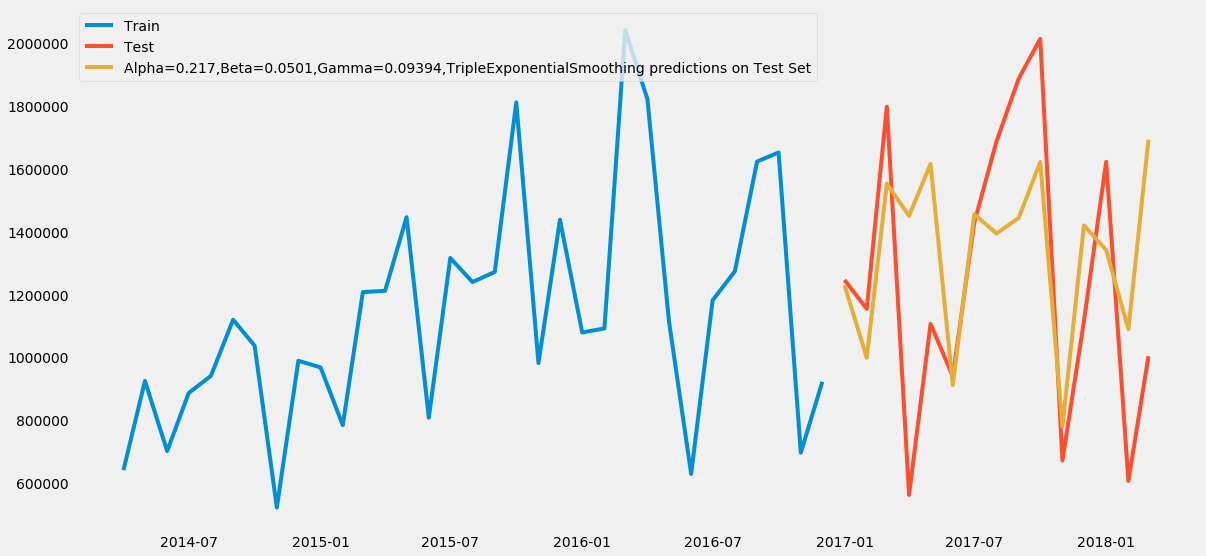

In [139]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [140]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.217,Beta=0.0501,Gamma=0.09394', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.217,Beta=0.0501,Gamma=0.09394', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 404312.586


In [141]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 33.713333888938116


In [142]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",453586.439994,40.261133
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",404312.585611,33.713334


In [143]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [144]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [89]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,2.524171e+05,4.689800e+05
1,0.1,0.1,0.2,2.535119e+05,4.677145e+05
2,0.1,0.1,0.3,2.549740e+05,4.727801e+05
3,0.1,0.1,0.4,2.566829e+05,4.832445e+05
4,0.1,0.1,0.5,2.585752e+05,4.981462e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,1.415595e+06,9.519544e+06
996,1.0,1.0,0.7,1.222420e+07,5.311984e+07
997,1.0,1.0,0.8,3.798106e+06,1.706762e+07
998,1.0,1.0,0.9,3.367667e+06,2.753937e+07


In [145]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
252,0.3,0.6,0.3,309209.840140,346925.966121
253,0.3,0.6,0.4,308711.989417,347373.233437
354,0.4,0.6,0.5,327205.444249,354017.882432
353,0.4,0.6,0.4,328380.112602,354389.015363
251,0.3,0.6,0.2,308019.156876,358416.471824


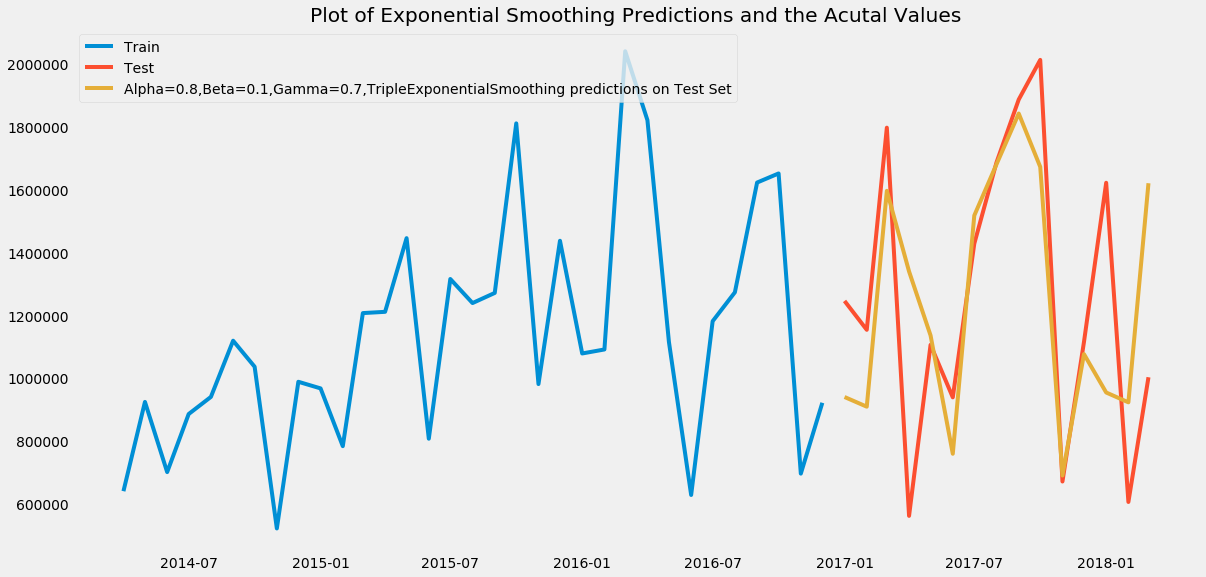

In [148]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.4000000000000000, 0.6000000000000000, 0.5], label='Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [149]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.4,0.6,0.5])
print('\nMAPE:',mape)


MAPE: 26.89365655104296


In [150]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",453586.439994,40.261133
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",404312.585611,33.713334
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",346925.966121,26.893657


In [151]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",346925.966121,26.893657
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",404312.585611,33.713334
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",453586.439994,40.261133
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
Simple Average,468562.164265,NaN


In [152]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

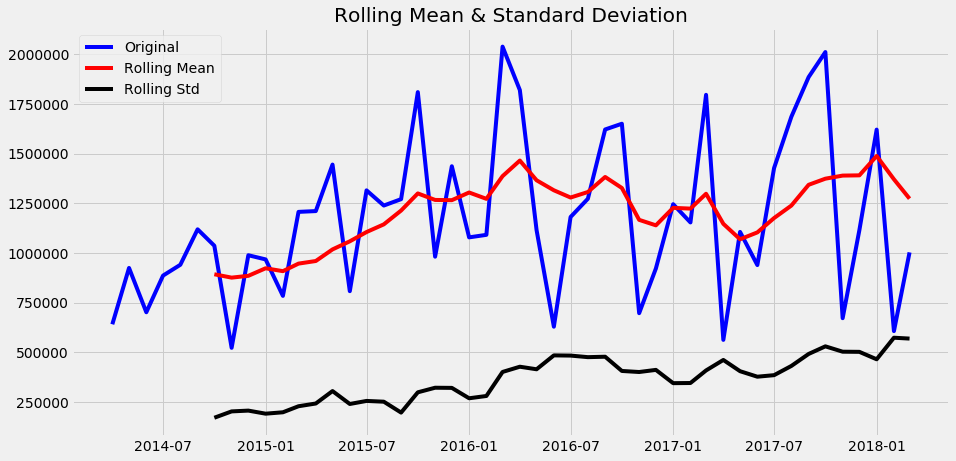

Results of Dickey-Fuller Test:
Test Statistic                -5.756943e+00
p-value                        5.790348e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [153]:
test_stationarity(Ahm_Mix['sales'])

In [154]:
#test_stationarity(Ban_Mix['sales'].diff().dropna())

In [316]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [317]:
test.dropna(inplace=True)

In [318]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [319]:
from statsmodels.tsa.stattools import adfuller

In [156]:
dftest = adfuller(Ahm_Mix['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -5.972
DF test p-value is 2.51319923696479e-06
Number of lags used 0


In [157]:
dftest = adfuller(train['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -0.781
DF test p-value is 0.9672366466614847
Number of lags used 9


In [158]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [159]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [160]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:1025.4918505542025
ARIMA(0, 0, 1) - AIC:941.4958785995848
ARIMA(0, 0, 2) - AIC:943.5517978020837
ARIMA(0, 0, 3) - AIC:944.4741783018443
ARIMA(1, 0, 0) - AIC:941.6077165876875
ARIMA(1, 0, 1) - AIC:940.6017367636806
ARIMA(1, 0, 2) - AIC:945.0029904486514
ARIMA(1, 0, 3) - AIC:941.1893529831831
ARIMA(2, 0, 0) - AIC:943.5011395321413
ARIMA(2, 0, 1) - AIC:942.428100586459
ARIMA(2, 0, 2) - AIC:943.2686627755238
ARIMA(2, 0, 3) - AIC:942.5935902824278
ARIMA(3, 0, 0) - AIC:945.5030168230037
ARIMA(3, 0, 1) - AIC:944.047648583586
ARIMA(3, 0, 2) - AIC:944.8581901044201
ARIMA(3, 0, 3) - AIC:945.0839869307987


In [161]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
5,"(1, 0, 1)",940.601737
7,"(1, 0, 3)",941.189353
1,"(0, 0, 1)",941.495879
4,"(1, 0, 0)",941.607717
9,"(2, 0, 1)",942.428101


In [162]:
auto_ARIMA = ARIMA(train['sales'], order=(1,0,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -466.301
Date:                Thu, 19 Aug 2021   AIC                            940.602
Time:                        16:39:00   BIC                            946.588
Sample:                    04-01-2014   HQIC                           942.616
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.132e+06   8.44e+04     13.407      0.000    9.66e+05     1.3e+06
ar.L1         -0.5449      0.270     -2.019      0.044      -1.074      -0.016
ma.L1          0.9656      0.297      3.251      0.0

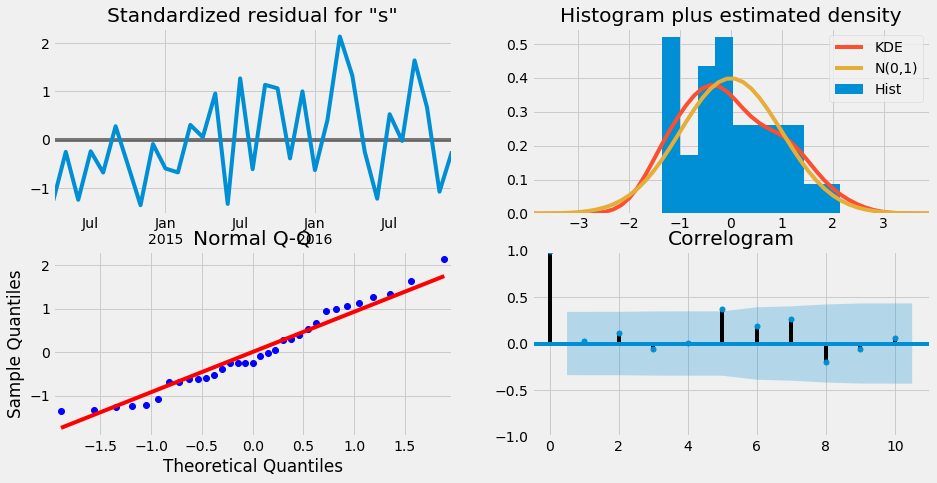

In [163]:
results_auto_ARIMA.plot_diagnostics();

In [164]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [165]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [166]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 466822.2632905456 
MAPE: 33.75040913832959


In [167]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,0,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,468562.164265,NaN
"Alpha=0.995,SimpleExponentialSmoothing",460672.574318,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",456387.404891,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",453586.439994,40.261133
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",404312.585611,33.713334
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",346925.966121,26.893657
"ARIMA(1,0,1)",26.893657,33.750409


In [168]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [169]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [170]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:988.7297755404459
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:615.5809481782197
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:227.58772610678704
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:604.2878119661431
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:565.7382115380742
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:229.5877257796659
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:260.17308601954085
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:257.1419963317256
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:231.5876952920809
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:940.9917902582363
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:575.2413486665429
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:217.02321336785354
SARIMA(0, 0, 1)x(0, 0, 3, 

SARIMA(2, 0, 2)x(0, 0, 3, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:544.2764624486379
SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:518.3436518356763
SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:181.2517360669338
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:207.22683992167165
SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:209.2073245845766
SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:183.6154143227059
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:824.6231803564366
SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:488.5973575290865
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:153.91128241698476
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:547.806755434623
SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:488.7512540665471
SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:1

In [171]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
67,"(1, 0, 0)","(0, 0, 3, 12)",10.0
28,"(0, 0, 1)","(3, 0, 0, 12)",10.0
7,"(0, 0, 0)","(1, 0, 3, 12)",10.0


In [172]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 0, 0),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Thu, 19 Aug 2021   AIC                              8.000
Time:                                  16:41:22   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

In [173]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [174]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,345001.462114,-676190.440358,676190.440358
2017-02-01,0.0,345001.462114,-676190.440358,676190.440358
2017-03-01,0.0,345001.462114,-676190.440358,676190.440358
2017-04-01,0.0,345001.462114,-676190.440358,676190.440358
2017-05-01,0.0,345000.012842,-676187.599836,676187.599836


In [175]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1779980492118.2666 
MAPE: 100.0


In [177]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,4.685622e+05,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.606726e+05,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",4.563874e+05,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",4.535864e+05,40.261133
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",4.043126e+05,33.713334
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",3.469260e+05,26.893657
"ARIMA(1,0,1)",2.689366e+01,33.750409
"SARIMA(0,1,0)(2,1,0)12",1.779980e+12,100.000000
"SARIMA(0,0,0)(0,0,3)12",1.779980e+12,100.000000


In [178]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,1)",2.689366e+01,33.750409
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",3.469260e+05,26.893657
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",4.043126e+05,33.713334
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",4.535864e+05,40.261133
"Alpha=0.1,SimpleExponentialSmoothing",4.563874e+05,35.816839
"Alpha=0.995,SimpleExponentialSmoothing",4.606726e+05,34.894548
Simple Average,4.685622e+05,NaN
"SARIMA(0,1,0)(2,1,0)12",1.779980e+12,100.000000
"SARIMA(0,0,0)(0,0,3)12",1.779980e+12,100.000000


In [179]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [180]:
Ahm_Mix1.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Ahmd,641078
2014-05-01,Mixers,05-01-2014,Ahmd,924673
2014-06-01,Mixers,06-01-2014,Ahmd,701687
2014-07-01,Mixers,07-01-2014,Ahmd,886175
2014-08-01,Mixers,08-01-2014,Ahmd,940564


In [181]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Ahm_Mix1['date'])
df_prophet['y'] = Ahm_Mix1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,671833
2017-12-01,2017-12-01,1114795
2018-01-01,2018-01-01,1620735
2018-02-01,2018-02-01,606837
2018-03-01,2018-03-01,1003019


In [182]:
df_prophet.shape

(48, 2)

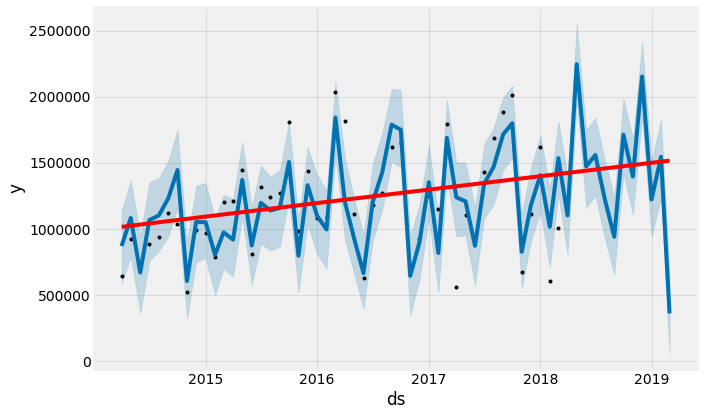

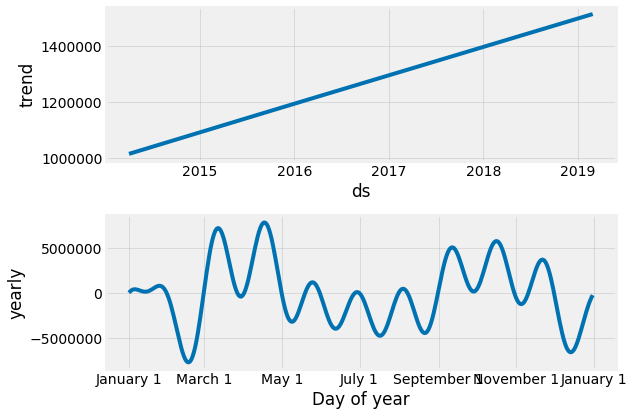

In [183]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [184]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.015331e+06,5.892874e+05,1.140926e+06,1.015331e+06,1.015331e+06,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,0.0,0.0,0.0,8.703238e+05
1,2014-05-01,1.023762e+06,7.872453e+05,1.367624e+06,1.023762e+06,1.023762e+06,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,0.0,0.0,0.0,1.082551e+06
2,2014-06-01,1.032473e+06,3.597494e+05,9.505790e+05,1.032473e+06,1.032473e+06,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,0.0,0.0,0.0,6.689596e+05
3,2014-07-01,1.040904e+06,7.587461e+05,1.352953e+06,1.040904e+06,1.040904e+06,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,0.0,0.0,0.0,1.066685e+06
4,2014-08-01,1.049616e+06,8.322419e+05,1.385121e+06,1.049616e+06,1.049616e+06,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,0.0,0.0,0.0,1.101695e+06
5,2014-09-01,1.058328e+06,9.423677e+05,1.514787e+06,1.058328e+06,1.058328e+06,1.733292e+05,1.733292e+05,1.733292e+05,1.733292e+05,1.733292e+05,1.733292e+05,0.0,0.0,0.0,1.231657e+06
6,2014-10-01,1.066759e+06,1.156917e+06,1.748885e+06,1.066759e+06,1.066759e+06,3.790779e+05,3.790779e+05,3.790779e+05,3.790779e+05,3.790779e+05,3.790779e+05,0.0,0.0,0.0,1.445837e+06
7,2014-11-01,1.075471e+06,3.220668e+05,9.035385e+05,1.075471e+06,1.075471e+06,-4.705890e+05,-4.705890e+05,-4.705890e+05,-4.705890e+05,-4.705890e+05,-4.705890e+05,0.0,0.0,0.0,6.048816e+05
8,2014-12-01,1.083901e+06,7.479715e+05,1.325195e+06,1.083901e+06,1.083901e+06,-3.238840e+04,-3.238840e+04,-3.238840e+04,-3.238840e+04,-3.238840e+04,-3.238840e+04,0.0,0.0,0.0,1.051513e+06
9,2015-01-01,1.092613e+06,7.776290e+05,1.348638e+06,1.092613e+06,1.092613e+06,-4.256738e+04,-4.256738e+04,-4.256738e+04,-4.256738e+04,-4.256738e+04,-4.256738e+04,0.0,0.0,0.0,1.050046e+06


In [185]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

416913471074.4865


In [186]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,4.685622e+05,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.606726e+05,34.894548
"Alpha=0.1,SimpleExponentialSmoothing",4.563874e+05,35.816839
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",4.535864e+05,40.261133
"Alpha=0.217,Beta=0.0501,Gamma=0.09394,TripleExponentialSmoothing",4.043126e+05,33.713334
"Alpha=0.8,Beta=0.1,Gamma=0.7,TripleExponentialSmoothing",3.469260e+05,26.893657
"ARIMA(1,0,1)",2.689366e+01,33.750409
"SARIMA(0,1,0)(2,1,0)12",1.779980e+12,100.000000
"SARIMA(0,0,0)(0,0,3)12",1.779980e+12,100.000000
Prophet,4.169135e+11,NaN


In [187]:
import fbprophet

In [188]:
m = fbprophet.Prophet()

In [189]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [190]:
future = m.make_future_dataframe(periods=365)

In [191]:
forecast = m.predict(future)

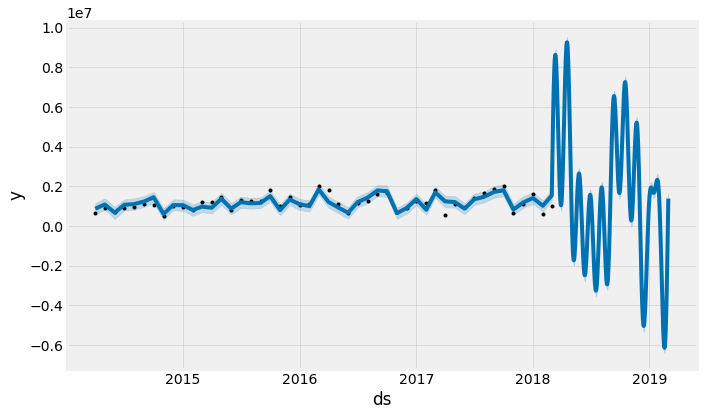

In [192]:
m.plot(forecast);

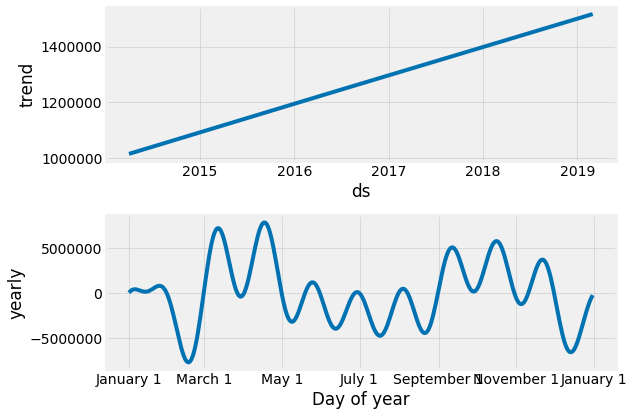

In [193]:
m.plot_components(forecast);

In [194]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,641078
2014-05-01,2014-05-01,924673
2014-06-01,2014-06-01,701687
2014-07-01,2014-07-01,886175
2014-08-01,2014-08-01,940564


In [195]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [196]:
predict=m.predict(future)

In [197]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,1.015331e+06,5.681707e+05,1.156692e+06,1.015331e+06,1.015331e+06,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,-1.450070e+05,0.0,0.0,0.0,8.703238e+05
1,2014-05-01,1.023762e+06,8.120064e+05,1.377999e+06,1.023762e+06,1.023762e+06,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,5.878899e+04,0.0,0.0,0.0,1.082551e+06
2,2014-06-01,1.032473e+06,3.697576e+05,9.447925e+05,1.032473e+06,1.032473e+06,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,-3.635139e+05,0.0,0.0,0.0,6.689596e+05
3,2014-07-01,1.040904e+06,7.823866e+05,1.386285e+06,1.040904e+06,1.040904e+06,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,2.578058e+04,0.0,0.0,0.0,1.066685e+06
4,2014-08-01,1.049616e+06,8.346120e+05,1.378666e+06,1.049616e+06,1.049616e+06,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,5.207888e+04,0.0,0.0,0.0,1.101695e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,1.515329e+06,-2.787808e+06,-2.221519e+06,1.515229e+06,1.515421e+06,-4.019893e+06,-4.019893e+06,-4.019893e+06,-4.019893e+06,-4.019893e+06,-4.019893e+06,0.0,0.0,0.0,-2.504563e+06
409,2019-02-26,1.515608e+06,-1.886657e+06,-1.317084e+06,1.515507e+06,1.515700e+06,-3.116951e+06,-3.116951e+06,-3.116951e+06,-3.116951e+06,-3.116951e+06,-3.116951e+06,0.0,0.0,0.0,-1.601344e+06
410,2019-02-27,1.515886e+06,-9.370560e+05,-3.458905e+05,1.515785e+06,1.515978e+06,-2.156343e+06,-2.156343e+06,-2.156343e+06,-2.156343e+06,-2.156343e+06,-2.156343e+06,0.0,0.0,0.0,-6.404576e+05
411,2019-02-28,1.516164e+06,7.832842e+04,6.472971e+05,1.516062e+06,1.516257e+06,-1.156231e+06,-1.156231e+06,-1.156231e+06,-1.156231e+06,-1.156231e+06,-1.156231e+06,0.0,0.0,0.0,3.599332e+05


In [198]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,8.703238e+05,568170.691876,1.156692e+06
1,2014-05-01,1.082551e+06,812006.431114,1.377999e+06
2,2014-06-01,6.689596e+05,369757.580485,9.447925e+05
3,2014-07-01,1.066685e+06,782386.564225,1.386285e+06
4,2014-08-01,1.101695e+06,834612.025270,1.378666e+06


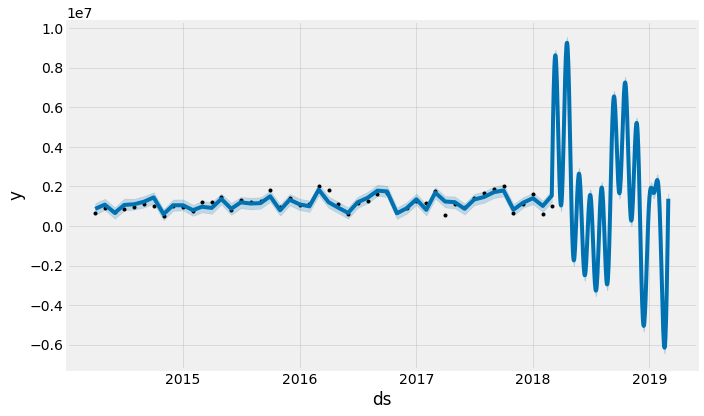

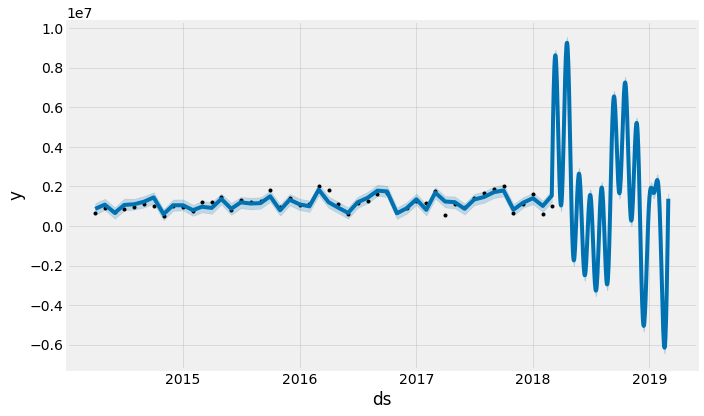

In [199]:
m.plot(predict)

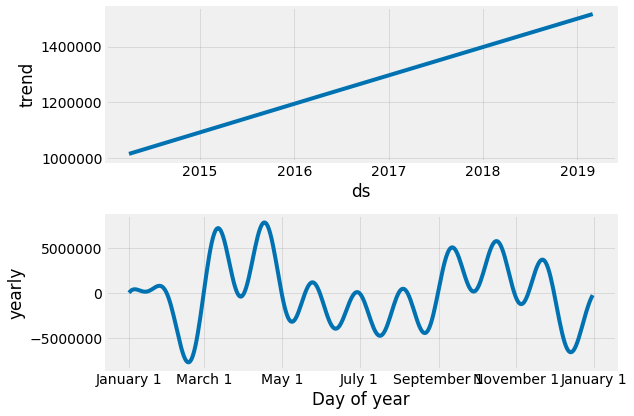

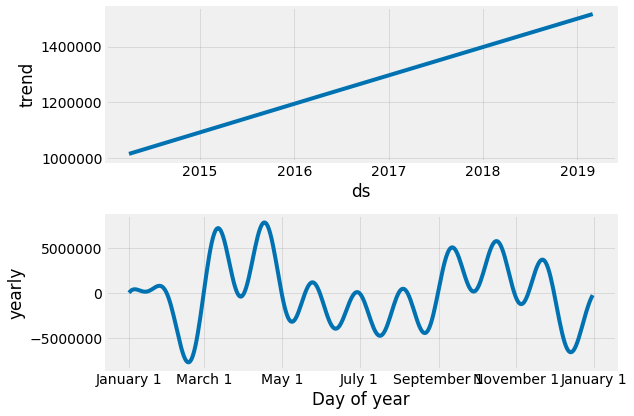

In [200]:
m.plot_components(predict)

In [201]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [202]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,1.743033e+06,1.590017e+06,1.908387e+06,1650369,2016-09-02
1,2016-11-01,1.277934e+06,1.114257e+06,1.432080e+06,696898,2016-09-02
2,2016-12-01,1.224330e+06,1.052840e+06,1.387592e+06,921900,2016-09-02
3,2017-01-01,1.479171e+06,1.315580e+06,1.641473e+06,1245386,2016-09-02
4,2017-02-01,7.489670e+05,5.928704e+05,9.084460e+05,1153678,2016-09-02


In [203]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,5.428932e+11,736812.889527,565273.182607,0.950324,0.950324,0.5
1,60 days,7.074011e+11,841071.424817,809459.020416,1.339123,1.339123,0.0
2,61 days,1.919044e+11,438068.963553,397996.202708,0.514047,0.514047,0.0
3,90 days,6.883524e+10,262364.711912,258693.520238,0.261200,0.261200,0.0
4,92 days,4.622679e+10,215004.152789,166943.252911,0.180774,0.180774,0.5


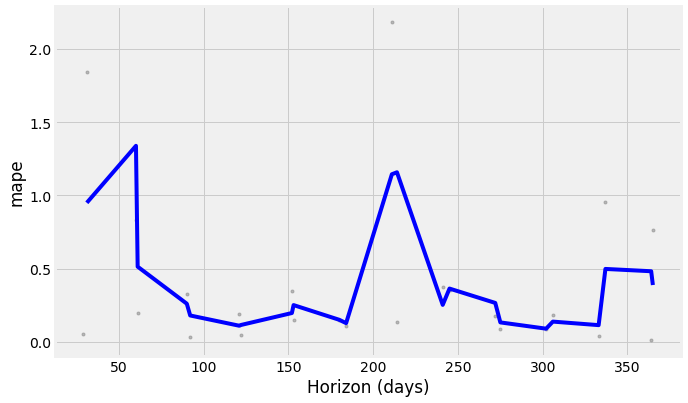

In [204]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

model = ARIMA(Ban_Mix['sales'], order=(1,1,2))
try:
    model_fit = model.fit()
except:
    pass
output = model_fit.forecast(12)
yhat = output[0]
print(model_fit.summary())

In [205]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(Ahm_Mix['sales'], (1,0,1)).fit()

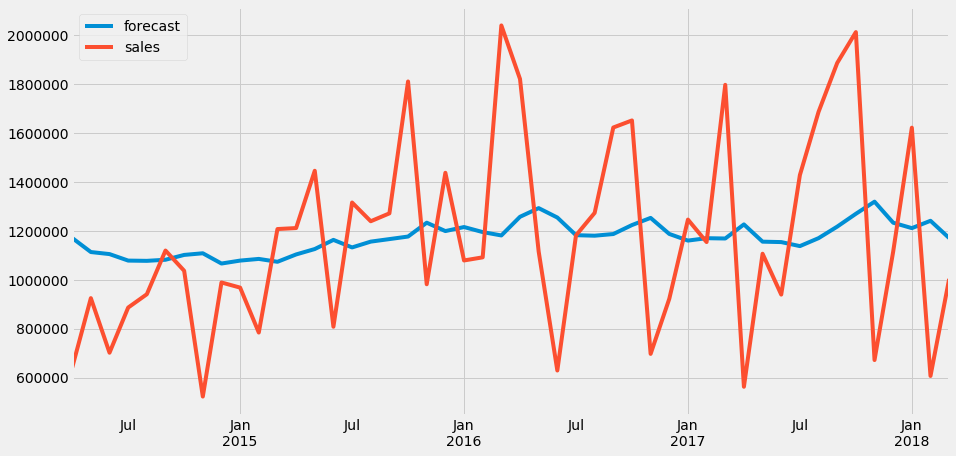

In [206]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [208]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(Ahm_Mix.sales, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(1, 1)   Log Likelihood                -686.214
Method:                       css-mle   S.D. of innovations         391075.756
Date:                Thu, 19 Aug 2021   AIC                           1380.429
Time:                        16:43:35   BIC                           1387.913
Sample:                    04-01-2014   HQIC                          1383.257
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         1.17e+06   8.27e+04     14.145      0.000    1.01e+06    1.33e+06
ar.L1.sales     0.8173      0.413      1.979      0.048       0.008       1.627
ma.L1.sales    -0.7263      0.478     -1.519    

In [209]:
test.shape

(15, 3)

In [212]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = Ahm_Mix.sales[:33]
test = Ahm_Mix.sales[33:]

In [213]:
test.shape

(15,)

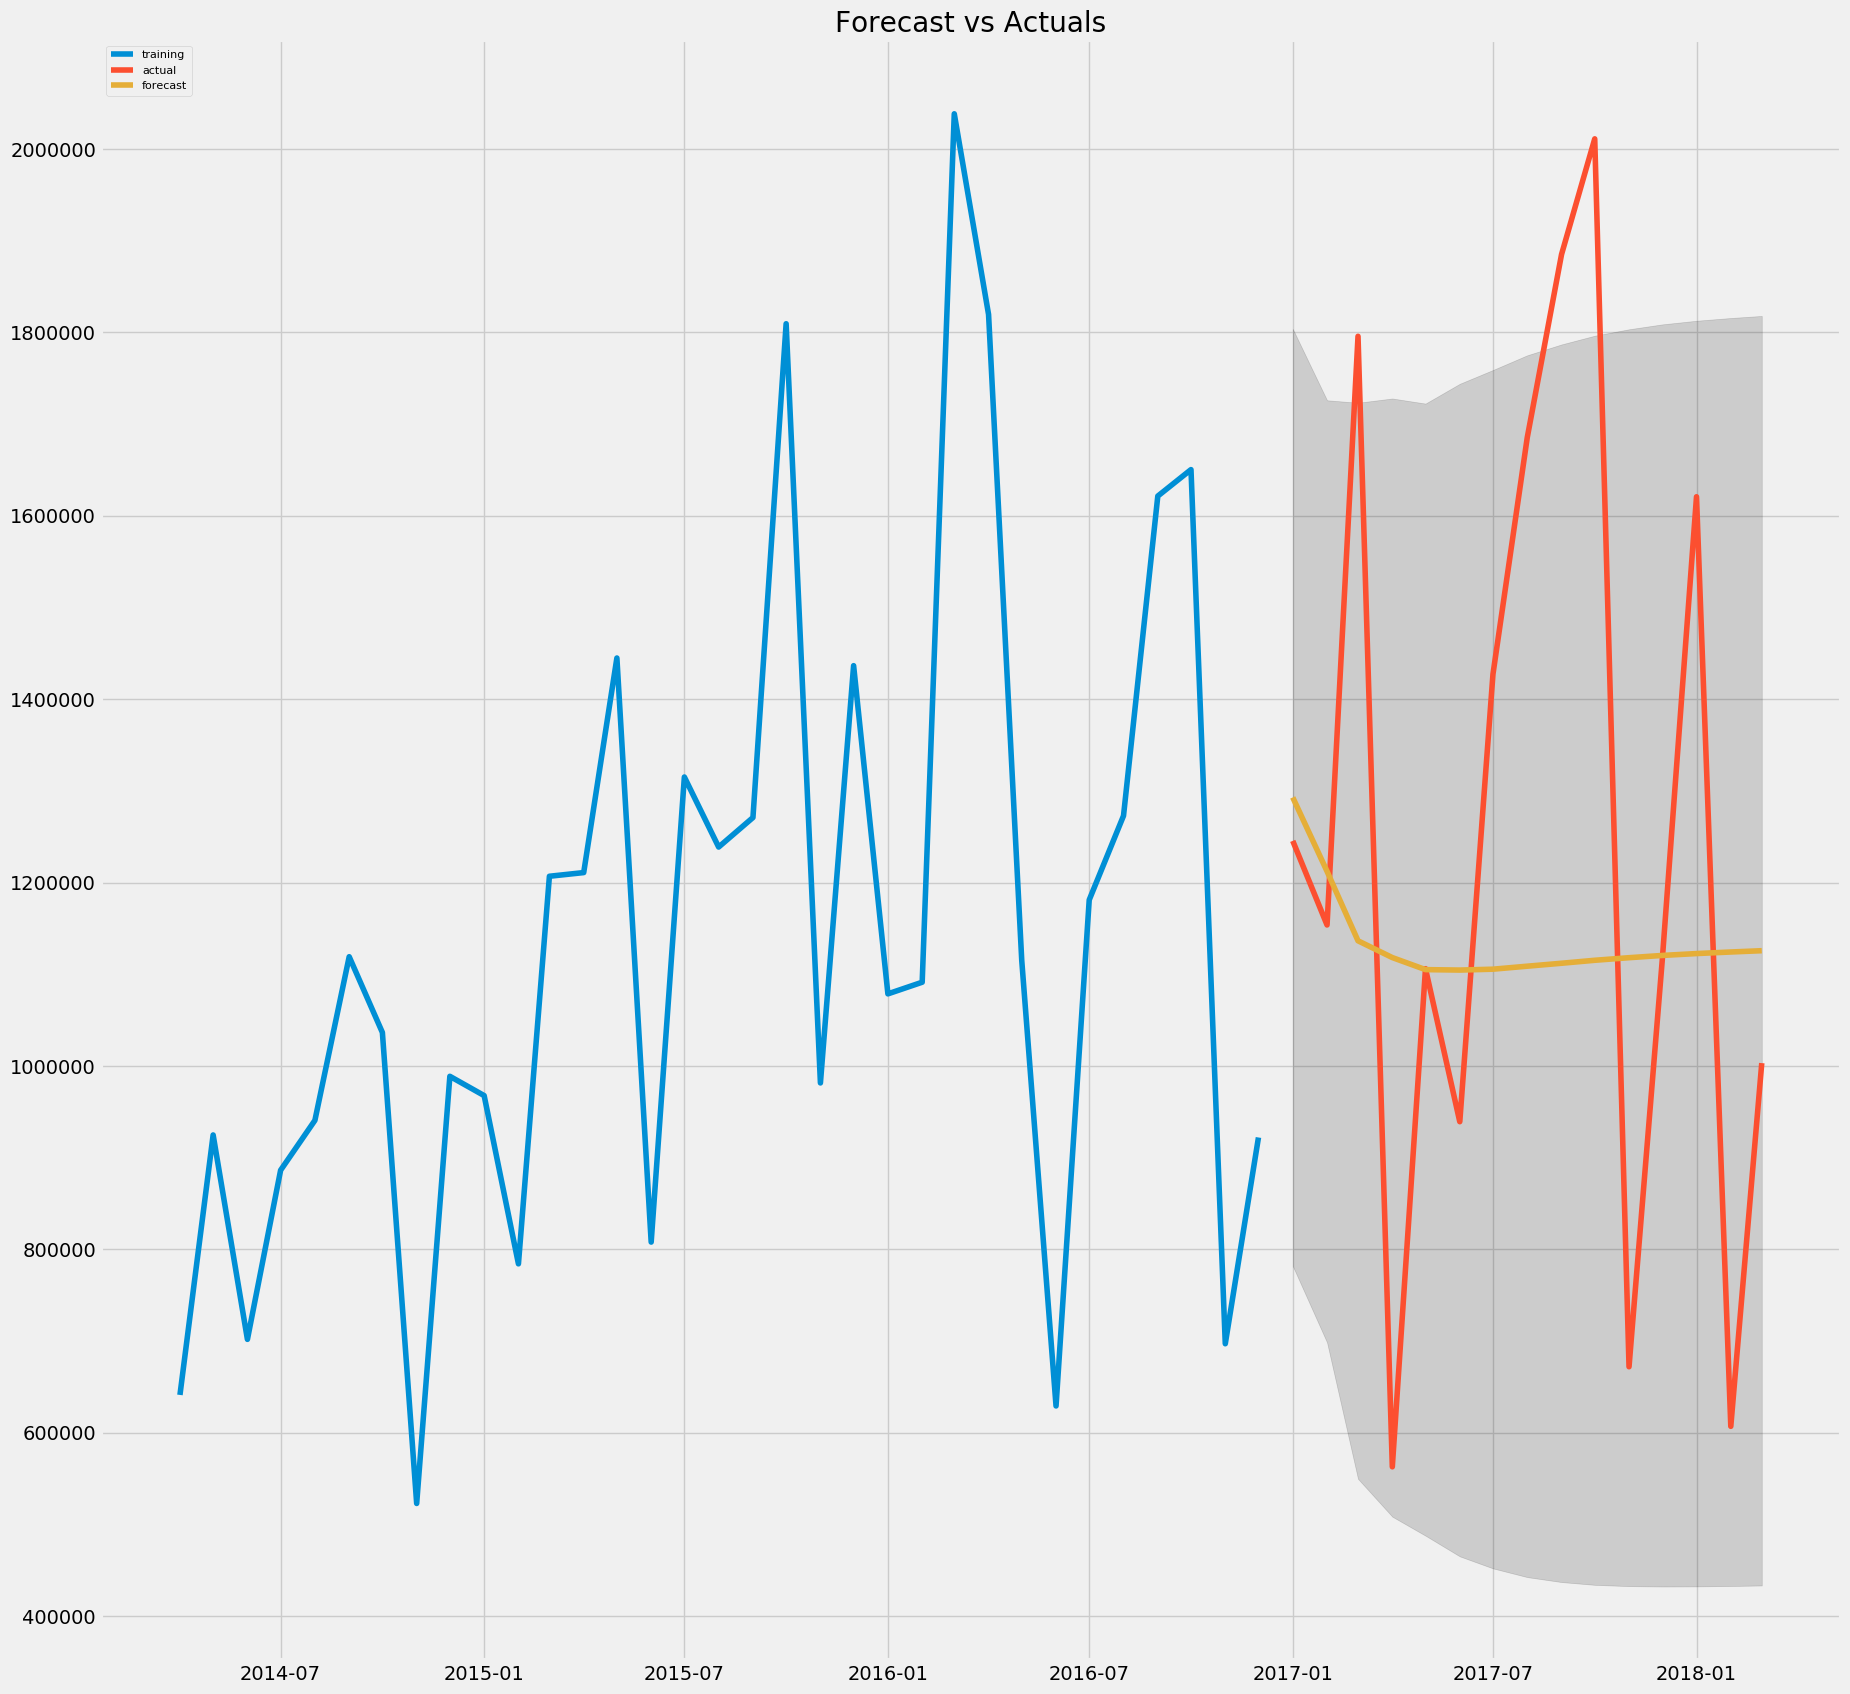

In [214]:
model = ARIMA(train, order=(3,0,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()